# UMAP explorations

<hr>
2025-03-25   

## The problem with hotmax    

I think now that there is a very serious problem with the  *hotmax* peak scanning approach of the `maxrf4u` package. In the case of complex objects with a large number of elements present, it seems to be the case we do not locate all peaks , due to shadowing by other peaks. Perhaps the only way we can fix this while managing one million spectra is by application of the UMAP algorithm. However, before looking into UMAP, we need too confirm this problem. Let's take a look again at our page 01 datastack... 

In [11]:
from glob import glob
import maxrf4u as mx 
import numpy as np 
import matplotlib.pyplot as plt 
import moseley as mos

In [3]:
datastack_file = '/home/frank/Work/DATA/falnama-data/WM-71803-01_400_600_50.datastack'

In [4]:
ds = mx.DataStack(datastack_file)

In [5]:
ds.tree()

/
├── compton_peak_energy (1,) float64
├── hotmax_baselines (32, 4096) float64
├── hotmax_noiselines (32, 4096) float64
├── hotmax_peak_idxs_flat (33,) int64
├── hotmax_peak_idxs_list (32, 2) int64
├── hotmax_spectra (32, 4096) float32
├── hotmax_spots (32, 2) int64
├── hotmax_subpeak_idxs_list (32, 19) int64
├── imvis_extent (4,) int64
├── imvis_reg (583, 355, 3) uint8
├── imvis_reg_ (583, 355, 3) uint8
├── imvis_reg_highres (8256, 5027, 3) uint8
├── imvis_reg_highres_ (8256, 5027, 3) uint8
├── maxrf_cube (583, 355, 4096) float32
├── maxrf_energies (4096,) float64
├── maxrf_maxspectrum (4096,) float32
├── maxrf_sumspectrum (4096,) float64
├── nmf_atomnums (18,) int64
├── nmf_elementmaps (18, 583, 355) float32
├── nmf_gausscomponents (34, 4096) float32
├── nmf_peakmaps (34, 583, 355) float32
└── nmf_peaks2elements_matrix (18, 33) float32

/home/frank/Work/DATA/falnama-data/WM-71803-01_400_600_50.datastack:




In [6]:
hma = mx.HotmaxAtlas(datastack_file)

In [32]:
%matplotlib widget

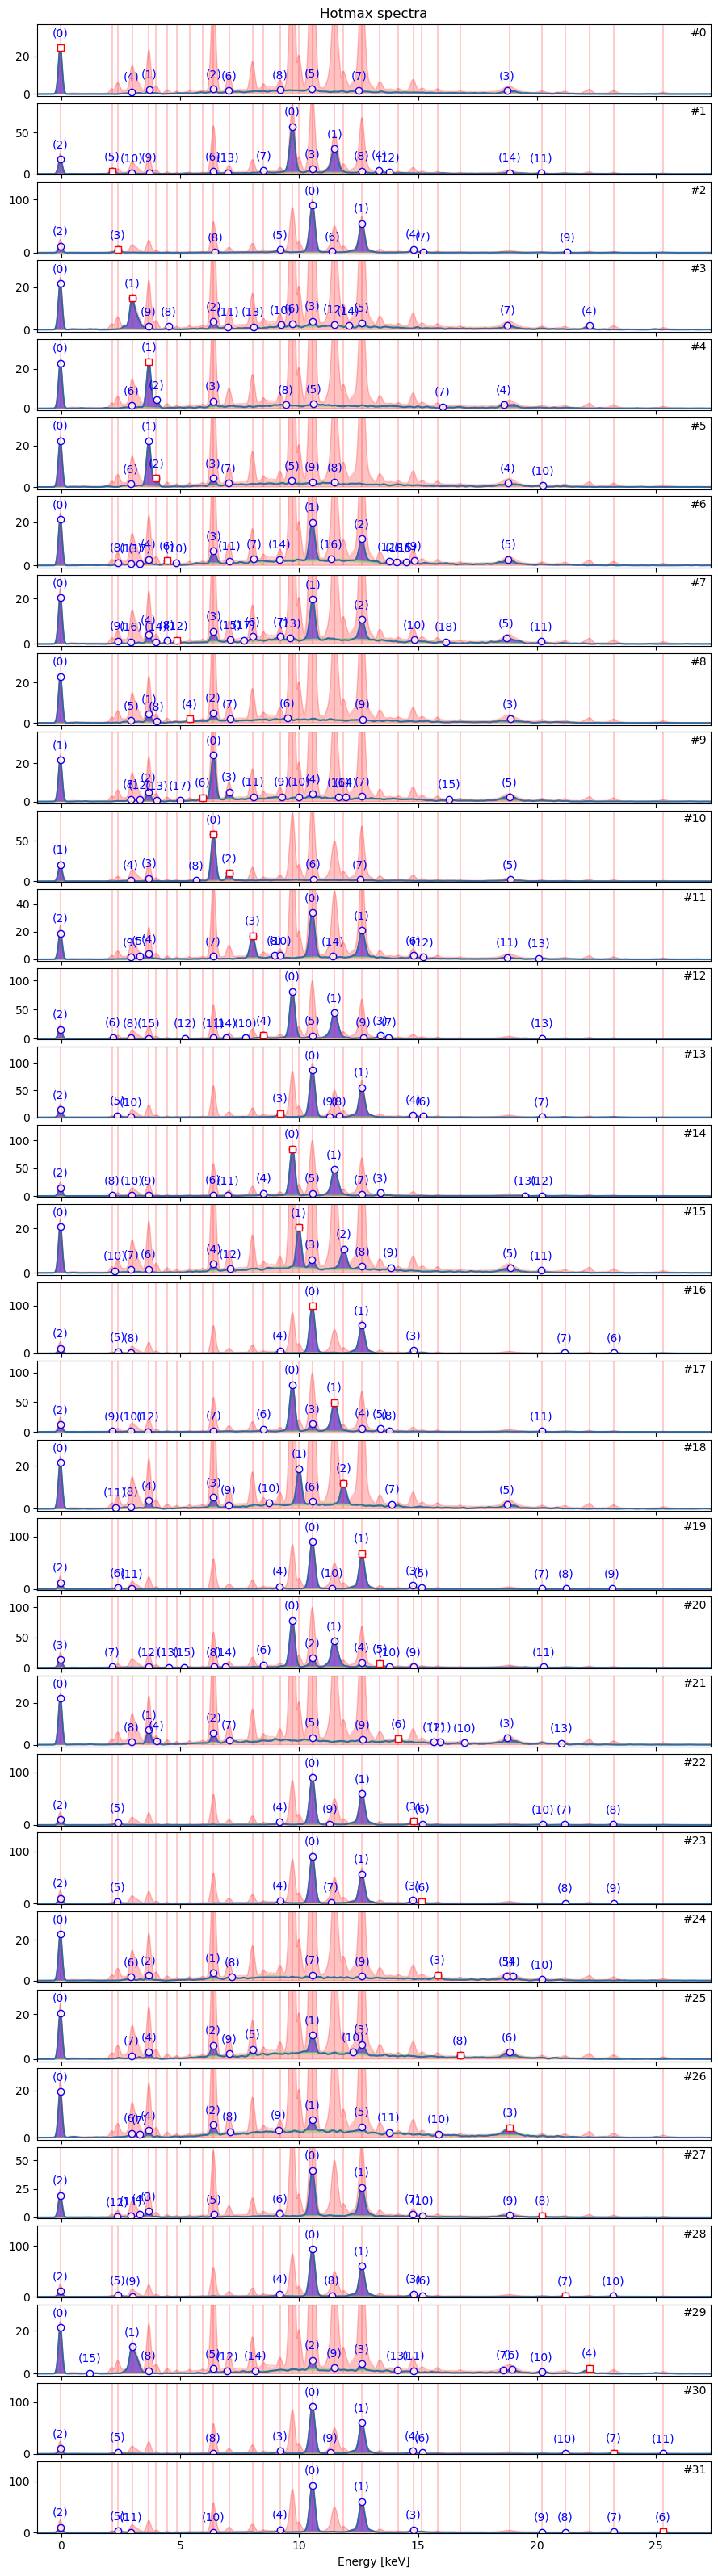

In [64]:
hma.plot_spectra(svg=False)

In [65]:
n = hma.finder('K')
n

False

**Indeed, we can not find potassium. Why is that?** 

In [66]:
elems = ['Au'] #['Ca', 'K', 'Sn', 'Pb', 'Zr', 'Au']
xfs = [mos.XFluo(elem, 23) for elem in elems]

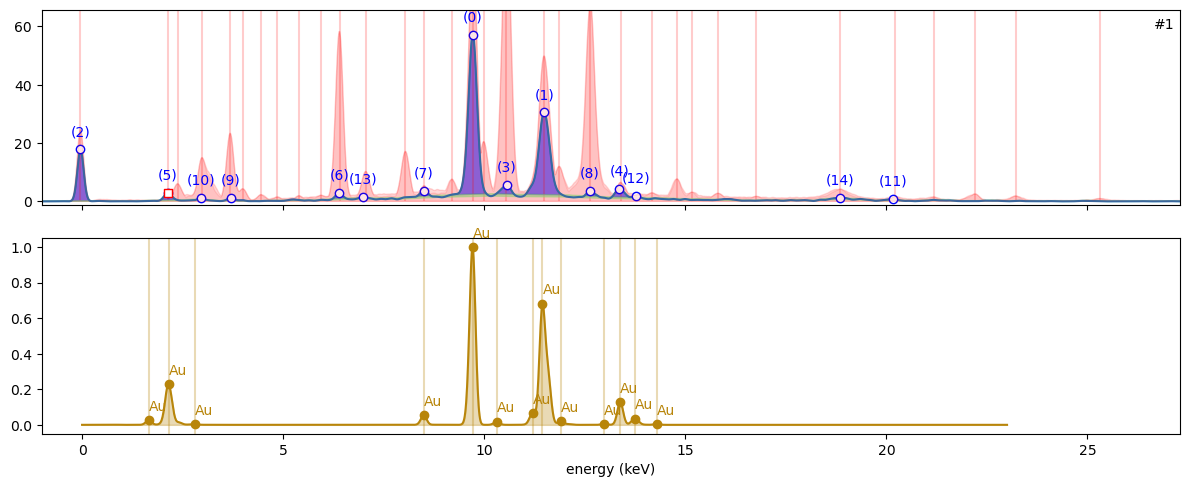

In [67]:
fig, axs = plt.subplots(nrows=2, figsize=[12, 5], sharex=True)
ax0, ax1 = axs.flatten()
hma.plot_spectrum(1, ax=ax0)
for xf in xfs: 
    xf.plot(ax=ax1)


In [62]:
%matplotlib inline

Please wait while initializing peak pattern atlas...


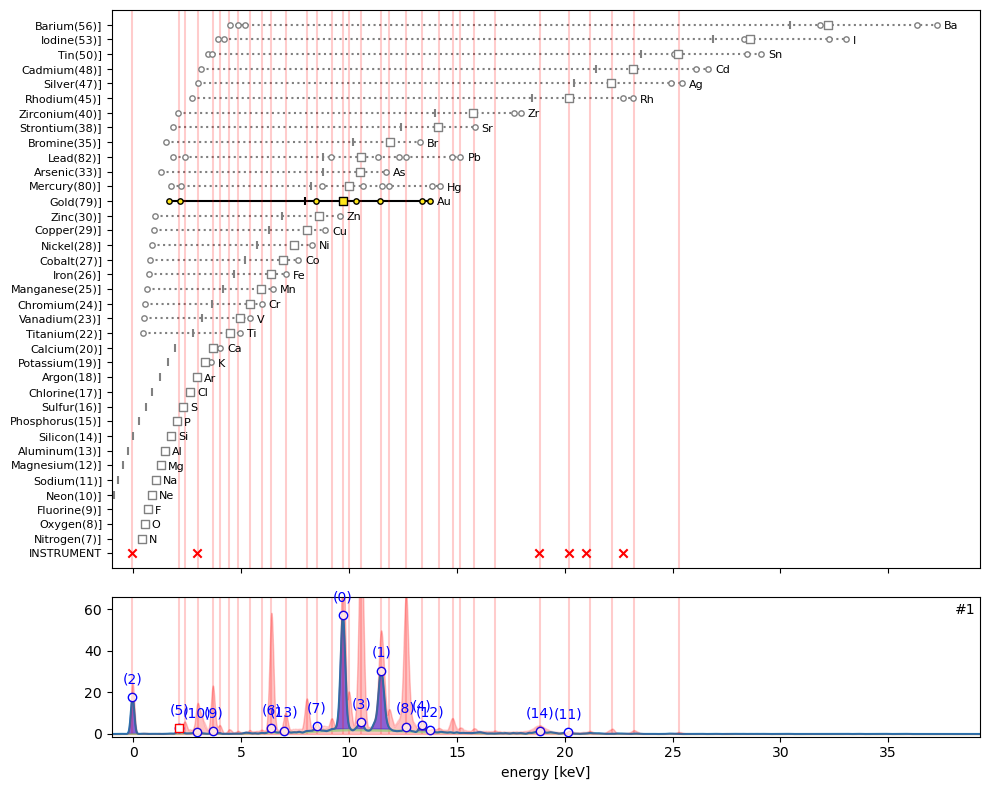

In [68]:
ppa = mx.Peak_Pattern_Atlas(datastack_file=datastack_file)
ppa.update_eoi(['Ar', 'Zr', 'Rh'])
ppa.plot_puzzle(1, select_elems=elems)